In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
import src

In [2]:
def p2p_resource_sharing(isolation_day=5):
    # Social network construction
    distance_matrix = np.load("../temp/southpark_distance_matrix.npy")
    strong_tie_matrix, weak_tie_matrix, stranger_matrix = src.get_social_network(distance_matrix, 
                                                                                 prop_fri = 0.2984610391613645,
                                                                                 degree_para=[0.8266, 0.0669],
                                                                                 dist_decay_alpha=-1.43)
    # willingness-to-share matrix
    share_group_proportion = np.loadtxt("../temp/southpark_transp_share_pref_distr")
    share_group = src.get_share_group(distance_matrix.shape[0], share_group_proportion)
    wts_matrix = src.get_willingness_to_share(strong_tie_matrix, weak_tie_matrix, stranger_matrix, share_group)
    # resource inventory
    resource_probability = np.loadtxt("../temp/southpark_transp_resource_distr")
    inventory = src.get_resource_inventory(distance_matrix.shape[0], resource_probability)
    # solve the model
    model = src.ResourceSharingModel(wts_matrix, inventory, isolation_day)
    model.solve()
    return model

In [3]:
# plot the resource distribution among the community as a Lorenz curve
def plot_lorenz_curve(resource_inventory, savefig=False, path="../figs/lorenz_curve.png"):
    num_households = len(resource_inventory)
    total_resource = sum(resource_inventory)
    resource_inventory = sorted(resource_inventory)

    # calculate the cumulative resource inventory
    cum_resource_inventory = [0]
    for i in range(num_households):
        cum_resource_inventory.append(cum_resource_inventory[i] + resource_inventory[i]/total_resource)

    # plot the 45 degree line
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    plt.plot(np.linspace(0, 1, num_households+1), np.linspace(0, 1, num_households+1), linewidth=2, color='b', label="Equal distribution line")

    # plot the Lorenz curve
    plt.plot(np.linspace(0, 1, num_households+1), cum_resource_inventory, linewidth=2, color='r', label="Actual distribution line")

    # fill the area between the Lorenz curve and the 45 degree line
    # plt.fill_between(np.linspace(0, 1, num_households+1), cum_resource_inventory, np.linspace(0, 1, num_households+1), color='grey', alpha=0.3)

    plt.xlabel("Cumulative proportion of households")
    plt.ylabel("Cumulative proportion of resources")
    plt.legend()

    if savefig:
        plt.savefig(path, dpi=300)

In [4]:
model = p2p_resource_sharing(isolation_day=3)
# The survival curve of the first week
t = np.arange(0, 10, 0.1)
plt.plot(t, src.get_survival_curve(model.resource, t), color='b', linewidth=3, label='survival curve')
plt.xlabel('Time/day')
plt.ylabel('Number of survival households')
plt.legend()
plt.xlim(0, 10)

AttributeError: module 'src' has no attribute 'get_social_network'

/Users/lzy95/anaconda3/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


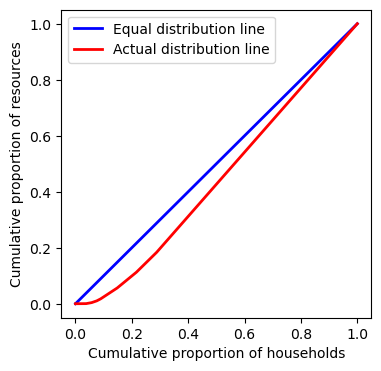

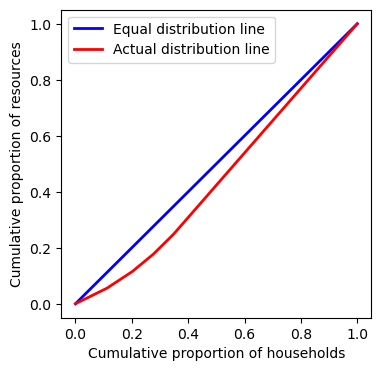

In [ ]:
distance_matrix = np.load("../temp/southpark_distance_matrix.npy")
resource_probability = np.loadtxt("../temp/southpark_transp_resource_distr")
resource_inventory = src.get_resource_inventory(distance_matrix.shape[0], resource_probability)
plot_lorenz_curve(resource_inventory)
plot_lorenz_curve(model.resource)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2758 rows, 1901641 columns and 3803282 nonzeros
Model fingerprint: 0x43caeee5
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+00]
Presolve removed 2170 rows and 1870234 columns
Presolve time: 0.42s
Presolved: 588 rows, 31407 columns, 62751 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 6.274e+03
 Factor NZ  : 1.120e+04 (roughly 3 MB of memory)
 Factor Ops : 7.777e+05 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 0.43 seconds (1.04 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Iteration 

(0.0, 10.0)

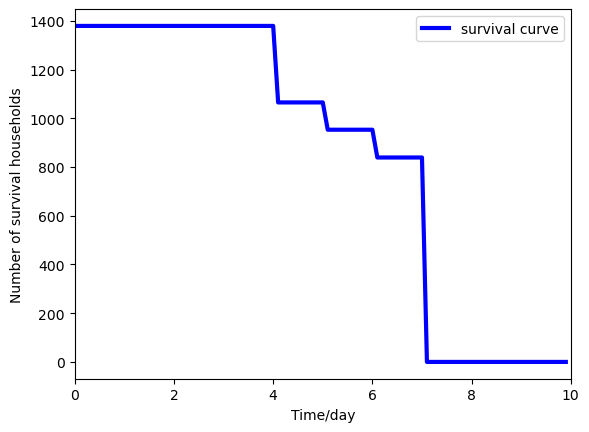

In [ ]:
model = p2p_resource_sharing(isolation_day=4)
# The survival curve of the first week
t = np.arange(0, 10, 0.1)
plt.plot(t, src.get_survival_curve(model.resource, t), color='b', linewidth=3, label='survival curve')
plt.xlabel('Time/day')
plt.ylabel('Number of survival households')
plt.legend()
plt.xlim(0, 10)

In [ ]:
resource_inventory = np.loadtxt("../temp/southpark_resource_inventory")
plot_lorenz_curve(resource_inventory)
plot_lorenz_curve(model.resource)

FileNotFoundError: ../temp/southpark_resource_inventory not found.

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2758 rows, 1901641 columns and 3803282 nonzeros
Model fingerprint: 0xa2c7ccb0
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 2025 rows and 1837029 columns
Presolve time: 0.40s
Presolved: 733 rows, 64612 columns, 129143 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.139e+04
 Factor NZ  : 3.878e+04 (roughly 10 MB of memory)
 Factor Ops : 5.700e+06 (less than 1 second per iteration)
 Threads    : 8

Barrier performed 0 iterations in 0.45 seconds (1.04 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Iteratio

(0.0, 10.0)

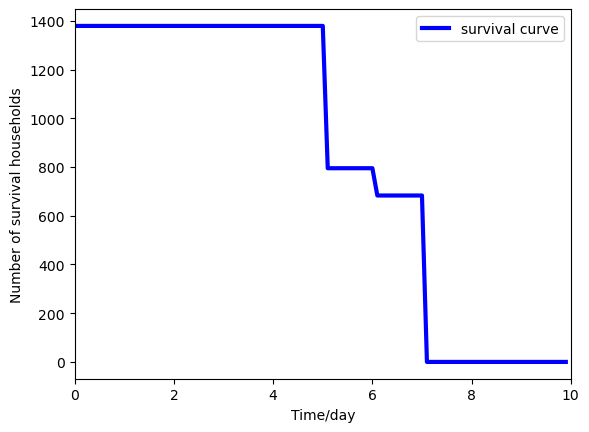

In [ ]:
model = p2p_resource_sharing(isolation_day=5)
# The survival curve of the first week
t = np.arange(0, 10, 0.1)
plt.plot(t, src.get_survival_curve(model.resource, t), color='b', linewidth=3, label='survival curve')
plt.xlabel('Time/day')
plt.ylabel('Number of survival households')
plt.legend()
plt.xlim(0, 10)

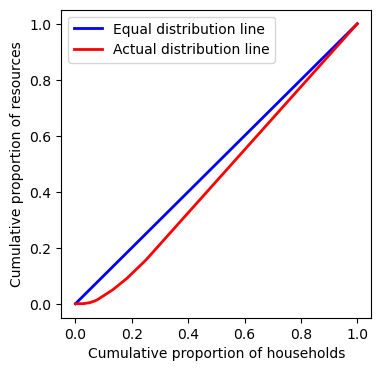

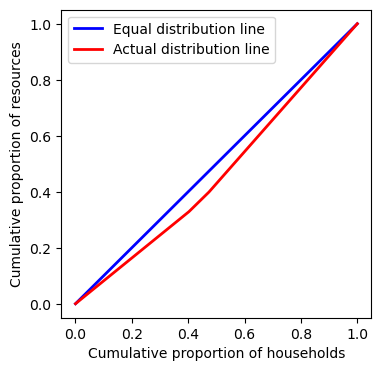

In [ ]:
resource_inventory = np.loadtxt("../temp/southpark_resource_inventory")
plot_lorenz_curve(resource_inventory, savefig=True, path="../figs/lorenz_curve_before.png")
plot_lorenz_curve(model.resource, savefig=True, path="../figs/lorenz_curve_after.png")

/Users/lzy95/anaconda3/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/0w/g946thld1vq1mh93x_4vjy8c0000gq/T/ipykernel_23385/1271508193.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('copper')  # Choose a colormap


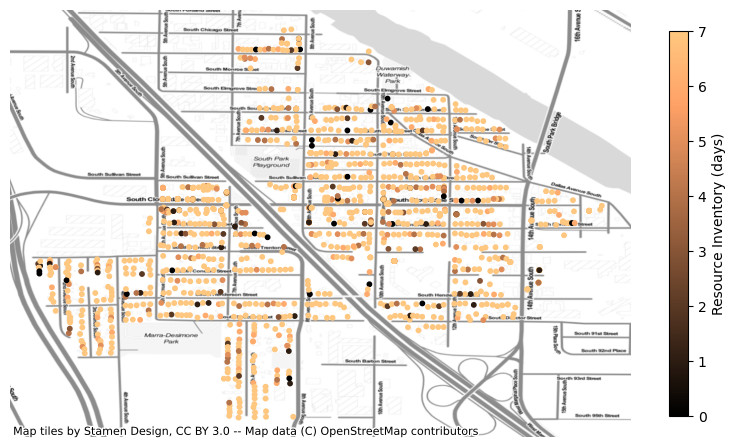

In [ ]:
import geopandas as gpd
import pandas as pd
import contextily as cx

households_df = pd.read_csv("../address keys/southpark_address.csv")

node_list = households_df['ID'].tolist()
node_pos = households_df[['longitude', 'latitude']].values

geometry = gpd.points_from_xy(node_pos[:,0], node_pos[:,1])
gdf = gpd.GeoDataFrame(households_df, geometry=geometry)
gdf.crs = {'init': 'epsg:4326'}

fig, ax = plt.subplots(figsize=(10, 10))

# set the node color to be proportional to the resource inventory
resource_inventory = np.loadtxt("../temp/southpark_resource_inventory")
cmap = plt.cm.get_cmap('copper')  # Choose a colormap
node_color = resource_inventory / max(resource_inventory)
node_color_mapped = cmap(node_color)

# Plot the GeoDataFrame
gdf.plot(ax=ax, markersize=10, color=node_color_mapped, alpha=1)

# add base map
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.Stamen.TonerLite)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(resource_inventory)
cbar = plt.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label('Resource Inventory (days)')

plt.axis('off')
plt.show()

# save the figure
fig.savefig("../figs/southpark_transp_resource_inventory.png", dpi=300, bbox_inches='tight')

/Users/lzy95/anaconda3/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/0w/g946thld1vq1mh93x_4vjy8c0000gq/T/ipykernel_23385/242789838.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('copper')  # Choose a colormap


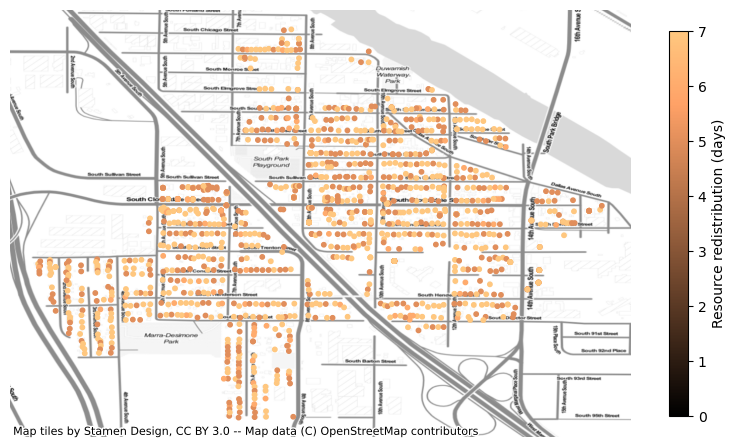

In [ ]:
households_df = pd.read_csv("../address keys/southpark_address.csv")

node_list = households_df['ID'].tolist()
node_pos = households_df[['longitude', 'latitude']].values

geometry = gpd.points_from_xy(node_pos[:,0], node_pos[:,1])
gdf = gpd.GeoDataFrame(households_df, geometry=geometry)
gdf.crs = {'init': 'epsg:4326'}

fig, ax = plt.subplots(figsize=(10, 10))

# set the node color to be proportional to the resource inventory
resource_inventory = model.resource
cmap = plt.cm.get_cmap('copper')  # Choose a colormap
node_color = resource_inventory / max(resource_inventory)
node_color_mapped = cmap(node_color)

# Plot the GeoDataFrame
gdf.plot(ax=ax, markersize=10, color=node_color_mapped, alpha=1)

# add base map
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.Stamen.TonerLite)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=7))
cbar = plt.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label('Resource redistribution (days)')

plt.axis('off')
plt.show()

# save the figure
fig.savefig("../figs/southpark_transp_resource_redistribution.png", dpi=300, bbox_inches='tight')

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2758 rows, 1901641 columns and 3803282 nonzeros
Model fingerprint: 0xab175045
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 6e+00]
Presolve removed 1948 rows and 1803089 columns
Presolve time: 0.39s
Presolved: 810 rows, 98552 columns, 197047 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.249e+04
 Factor NZ  : 6.191e+04 (roughly 14 MB of memory)
 Factor Ops : 1.301e+07 (less than 1 second per iteration)
 Threads    : 8

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.05701498e+05  1.29230154e+03 

(0.0, 10.0)

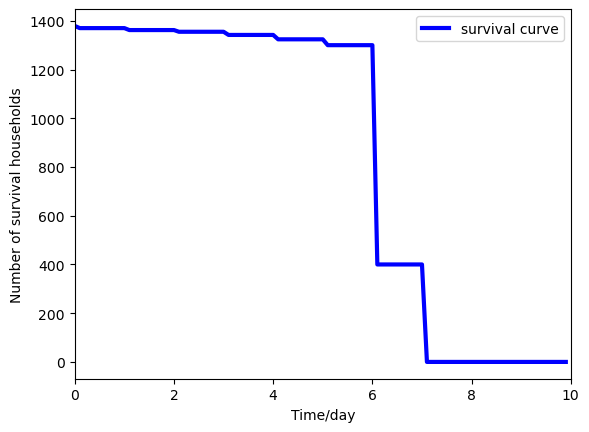

In [ ]:
model = p2p_resource_sharing(isolation_day=6)
# The survival curve of the first week
t = np.arange(0, 10, 0.1)
plt.plot(t, em.get_survival_curve(model.resource, t), color='b', linewidth=3, label='survival curve')
plt.xlabel('Time/day')
plt.ylabel('Number of survival households')
plt.legend()
plt.xlim(0, 10)

/Users/lzy95/anaconda3/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


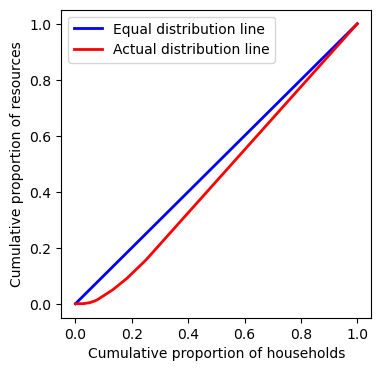

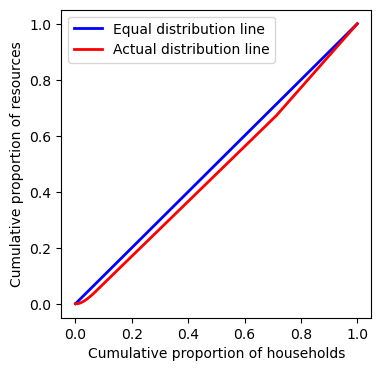

In [ ]:
resource_inventory = np.loadtxt("../temp/southpark_resource_inventory")
plot_lorenz_curve(resource_inventory)
plot_lorenz_curve(model.resource)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2758 rows, 1901641 columns and 3803282 nonzeros
Model fingerprint: 0x9202270a
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 7e+00]
Presolve removed 2758 rows and 1901641 columns
Presolve time: 0.23s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.37 seconds (0.61 work units)
Optimal objective -0.000000000e+00


(0.0, 10.0)

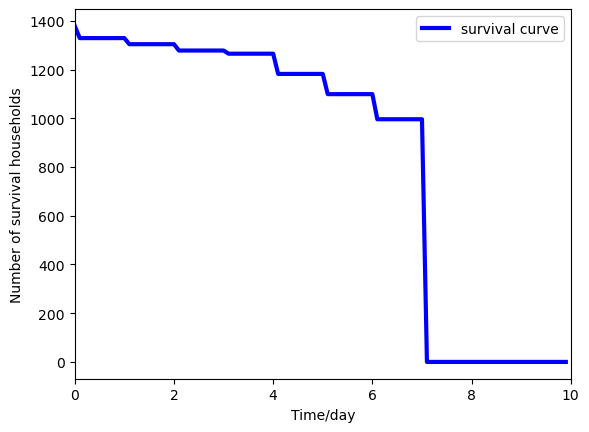

In [ ]:
model = p2p_resource_sharing(isolation_day=7)
# The survival curve of the first week
t = np.arange(0, 10, 0.1)
plt.plot(t, em.get_survival_curve(model.resource, t), color='b', linewidth=3, label='survival curve')
plt.xlabel('Time/day')
plt.ylabel('Number of survival households')
plt.legend()
plt.xlim(0, 10)

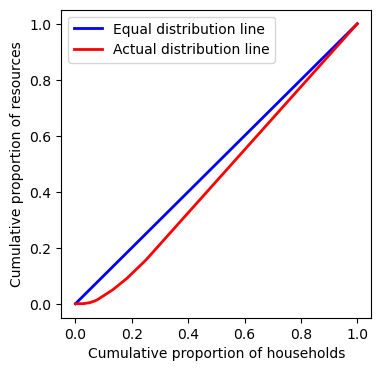

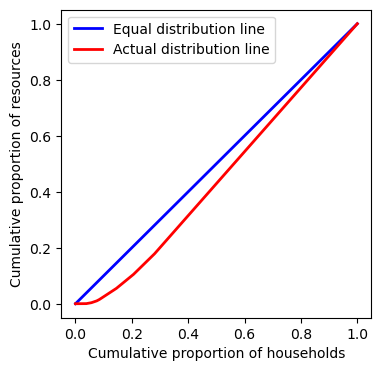

In [ ]:
resource_inventory = np.loadtxt("../temp/southpark_resource_inventory")
plot_lorenz_curve(resource_inventory)
plot_lorenz_curve(model.resource)